In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.special import inv_boxcox

In [ ]:
pd.read_csv()

# Miedź

In [6]:
copper = pd.read_csv('data/copper.csv')
copper

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,4.1065,98124,4.1285,4.1955,4.0950
1,04/13/2023,4.1240,88437,4.0700,4.1430,4.0535
2,04/12/2023,4.0810,88325,4.0295,4.0880,3.9840
3,04/11/2023,4.0195,81243,3.9870,4.0540,3.9780
4,04/10/2023,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...,...
1255,04/20/2018,3.1555,33960,3.1490,3.1685,3.1275
1256,04/19/2018,3.1540,37634,3.1835,3.2180,3.1350
1257,04/18/2018,3.1815,51721,3.1100,3.2015,3.0995
1258,04/17/2018,3.0795,88784,3.0835,3.1020,3.0545


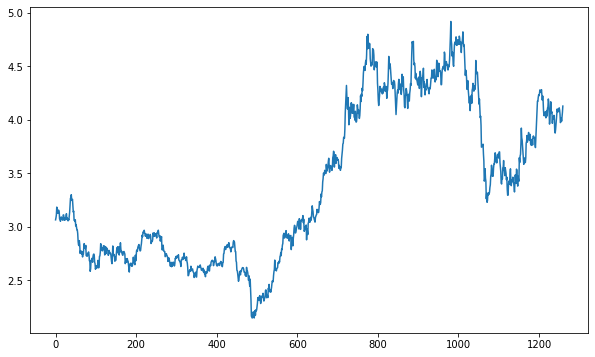

In [97]:
Y = np.array(copper.Open.values[::-1])

plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

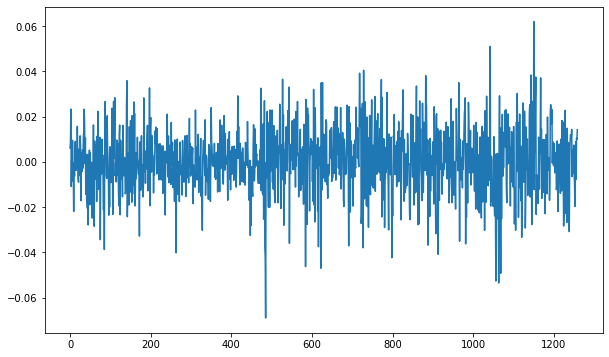

In [98]:
X = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X)
plt.show()

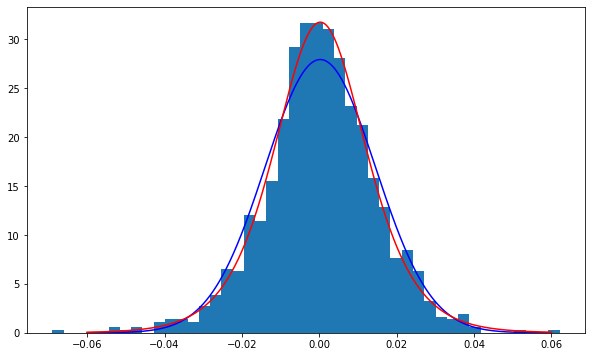

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(X, bins=45, density=True)
xs = np.linspace(-0.06, 0.06, 1000)
plt.plot(xs, sp.norm.pdf(xs, np.mean(X), np.std(X)), c='blue')
plt.plot(xs, sp.logistic.pdf(xs, np.mean(X), np.sqrt(3)/np.pi * np.std(X)), c='red')
plt.show()

In [150]:
sp.kstest(X, 'logistic', [np.mean(X), np.sqrt(3)/np.pi * np.std(X)])

KstestResult(statistic=0.017299896308711815, pvalue=0.8392824194992375)

# Aluminium

In [7]:
aluminium = pd.read_csv('data/aluminium.csv')
aluminium

,Date,Close/Last,Volume,Open,High,Low
0,04/12/2023,2328.50,1205.0,2311.00,2335.0,2293.50
1,04/11/2023,2306.75,1979.0,2333.75,2335.5,2302.50
2,04/10/2023,2348.00,2215.0,2348.00,2348.0,2348.00
3,04/06/2023,2338.25,1373.0,2355.00,2359.5,2329.25
4,04/05/2023,2370.00,NaN,2370.00,2370.0,2370.00
...,...,...,...,...,...,...
1254,04/19/2018,2300.00,NaN,2300.00,2300.0,2300.00
1255,04/18/2018,2300.00,NaN,2300.00,2300.0,2300.00
1256,04/17/2018,2300.00,NaN,2300.00,2300.0,2300.00
1257,04/16/2018,2300.00,NaN,2300.00,2300.0,2300.00


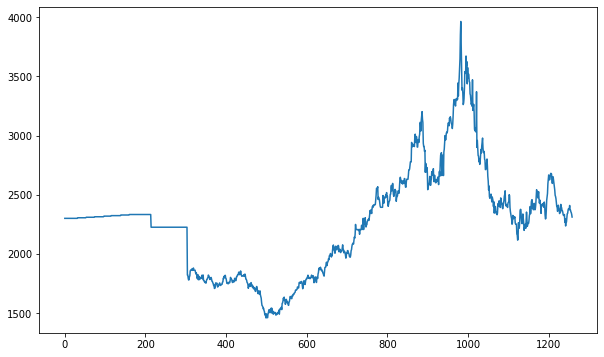

In [8]:
Y = np.array(aluminium.Open.values[::-1])

plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

In [9]:
idx = aluminium.index[aluminium['Date'] == '07/01/2019'].tolist()[0]
aluminium = aluminium.drop(aluminium.index[idx:1259])
Y = np.array(aluminium.Open.values[::-1])

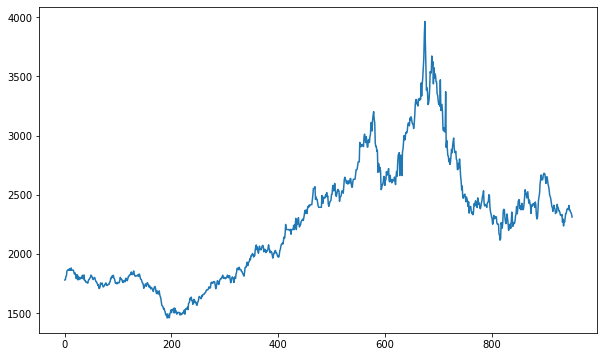

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

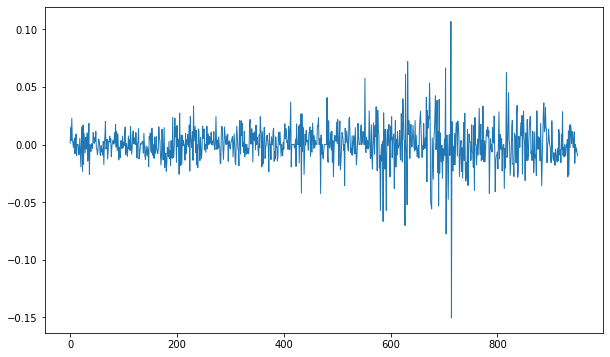

In [158]:
X = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X, lw=1)
plt.show()

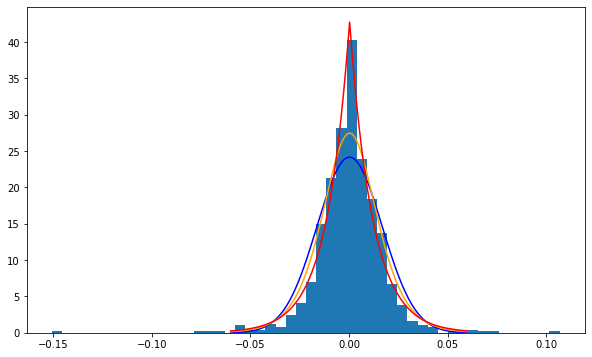

In [160]:
plt.figure(figsize=(10, 6))
plt.hist(X, bins=50, density=True)
xs = np.linspace(-0.06, 0.06, 1000)
plt.plot(xs, sp.norm.pdf(xs, np.mean(X), np.std(X)), c='blue')
plt.plot(xs, sp.logistic.pdf(xs, np.mean(X), np.sqrt(3)/np.pi * np.std(X)), c='orange')
plt.plot(xs, sp.laplace.pdf(xs, np.mean(X), 1/np.sqrt(2) * np.std(X)), c='red')
plt.show()

In [51]:
Y_, lambda_ = sp.boxcox(Y)

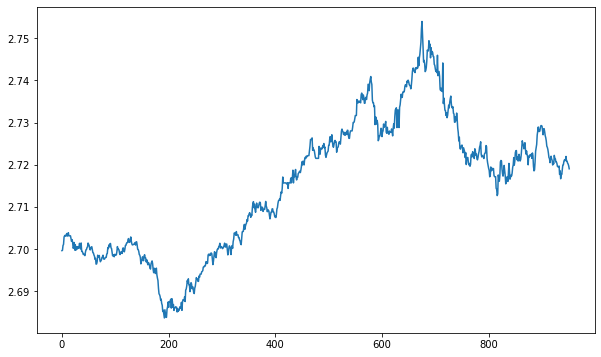

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(Y_)
plt.show()

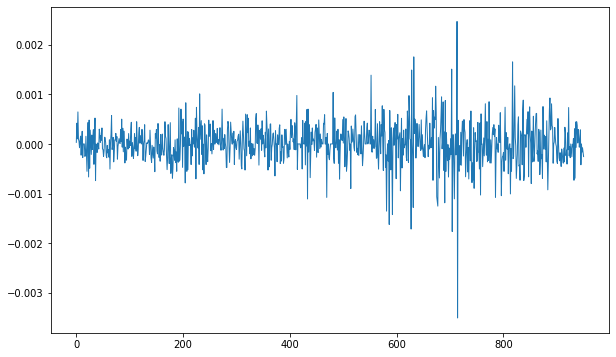

In [117]:
X_ = np.log(Y_[1:] / Y_[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X_, lw=1)
plt.show()

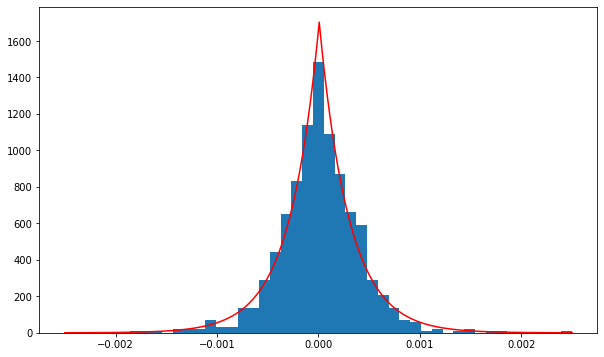

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(X_, bins=47, density=True, range=(-0.0025, 0.0025))
xs = np.linspace(-0.0025, 0.0025, 1000)
#plt.plot(xs, sp.norm.pdf(xs, np.mean(X_), np.std(X_)), c='blue')
#plt.plot(xs, sp.logistic.pdf(xs, np.mean(X_), np.sqrt(3)/np.pi * np.std(X_)), c='red')
plt.plot(xs, sp.laplace.pdf(xs, np.mean(X_), 1/np.sqrt(2) * np.std(X_)), c='red')
plt.show()

In [149]:
sp.kstest(X_, 'laplace', [np.mean(X_), 1/np.sqrt(2) * np.std(X_)])

KstestResult(statistic=0.029911487957002825, pvalue=0.35552465578415693)

# Wpływ ropy na cenę miedzi

In [153]:
crudeoil = pd.read_csv('data/crudeoil.csv')
crudeoil

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,82.52,243847,82.40,83.12,81.76
1,04/13/2023,82.16,233440,83.22,83.44,82.11
2,04/12/2023,83.26,323826,81.44,83.53,81.28
3,04/11/2023,81.53,282640,79.88,81.59,79.37
4,04/10/2023,79.74,238729,80.50,81.22,79.61
...,...,...,...,...,...,...
1255,04/20/2018,68.40,22739,68.26,68.62,67.50
1256,04/19/2018,68.29,89450,68.75,69.56,67.98
1257,04/18/2018,68.47,207210,66.68,68.91,66.56
1258,04/17/2018,66.52,472785,66.42,66.75,65.56


In [154]:
X = np.array(copper.Open.values[::-1])
Y = np.array(crudeoil.Open.values[::-1])

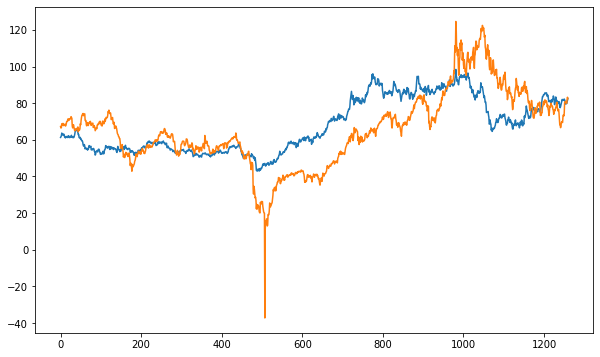

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(X * 20)
plt.plot(Y)
plt.show()

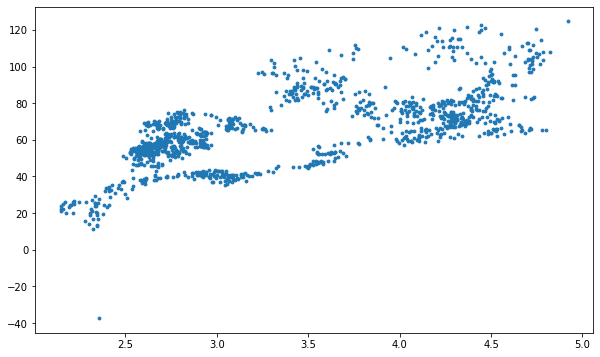

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, s=8)
plt.show()

<ipython-input-211-6384ded1219f>:2: RuntimeWarning: invalid value encountered in log
  Y_ = np.log(Y[1:] / Y[:-1])


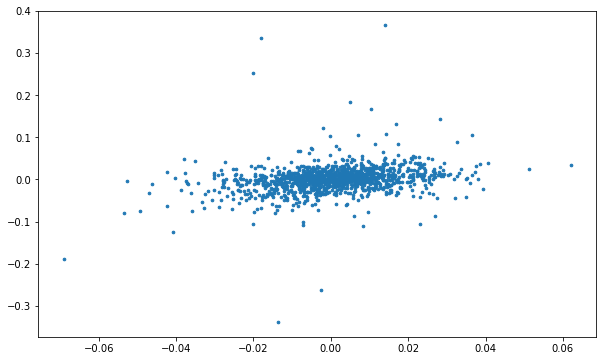

In [211]:
X_ = np.log((X)[1:] / (X)[:-1])
Y_ = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.scatter(X_, Y_, s=7)
#plt.ylim(-0.1, 0.1)
plt.show()

In [213]:
sp.spearmanr(X_, Y_)

SpearmanrResult(correlation=nan, pvalue=nan)

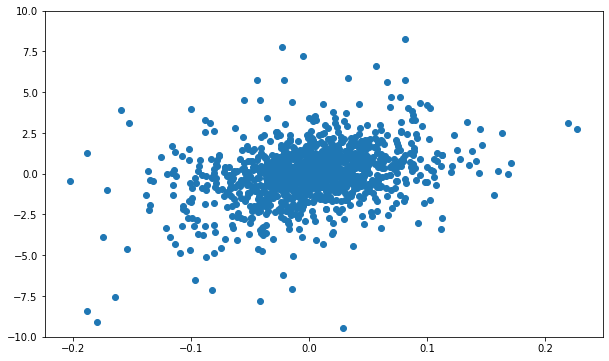

In [208]:
X_ = np.diff(X)
Y_ = np.diff(Y)

plt.figure(figsize=(10, 6))
plt.scatter(X_, Y_)
plt.ylim(-10, 10)
plt.show()

In [197]:
def regression(X, Y, display_plot=False):
    r = np.corrcoef(X, Y)[0, 1]
    Sx = np.std(X)
    Sy = np.std(Y)
    a = r * Sy / Sx
    b = np.mean(Y) - a * np.mean(X)

    if display_plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(X, Y, s=7, alpha=0.5)
        xs = np.linspace(min(X), max(X), 1000)
        plt.plot(xs, a * xs + b, c='red', lw=2)
        plt.ylim(-10, 10)
        plt.show()
    return [a, b]


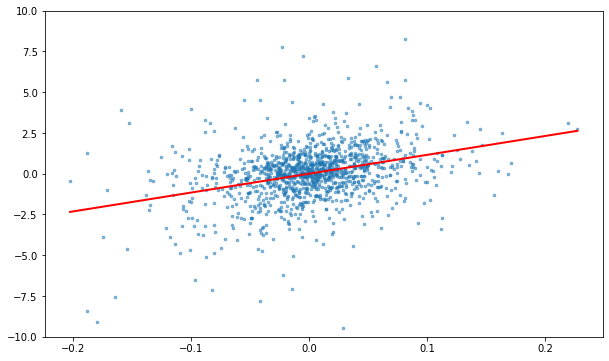

[11.572668309565678, 0.0022610650664194824]

In [206]:
regression(X_, Y_, True)

In [209]:
np.corrcoef(X_, Y_)[0, 1]

sp.pearsonr(X_, Y_)

(0.2082412696644671, 8.423810295766865e-14)

# Rozkład maksimum

## Miedź

In [10]:
copper_10y = pd.read_csv('data/copper10yrs.csv')

In [11]:
Y = np.array(copper_10y.Open.values[::-1])
X = np.log(Y[1:] / Y[:-1])
X = X[X > 0]
len(X)

1267

n = 126
ksi = 0.07568019006684479
mu = 0.02144249900604158
sigma = 0.008213164153487319


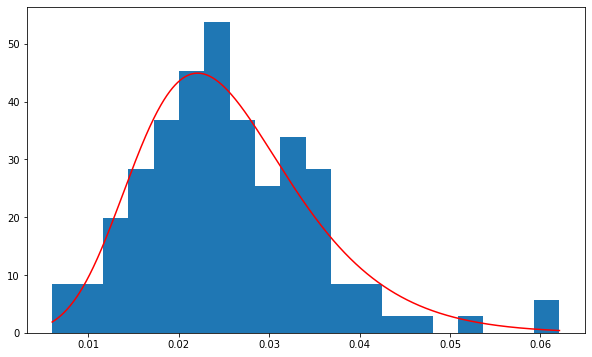

In [12]:
L = []
step = 10
i = step
while i < len(X) + 1:
    L.append(max(X[i-step:i]))
    i += step
print('n =', len(L))

ksi, mu, sigma = sp.genextreme.fit(L)
print('ksi =', ksi)
print('mu =', mu)
print('sigma =', sigma)

plt.figure(figsize=(10, 6))
plt.hist(L, bins=20, density=True)
xs = np.linspace(min(L), max(L), 1000)
plt.plot(xs, sp.genextreme.pdf(xs, ksi, mu, sigma), c='red')
plt.show()

In [13]:
sp.kstest(L, 'genextreme', [ksi, mu, sigma])

KstestResult(statistic=0.04430208156946658, pvalue=0.9563713710807306)

## Aluminium

In [17]:
Y = np.array(aluminium.Open.values[::-1])
X = np.log(Y[1:] / Y[:-1])
X = X[X > 0]
len(X)

464

n = 46
ksi = -0.2566022727570442
mu = 0.021359287947934964
sigma = 0.008716402453550754


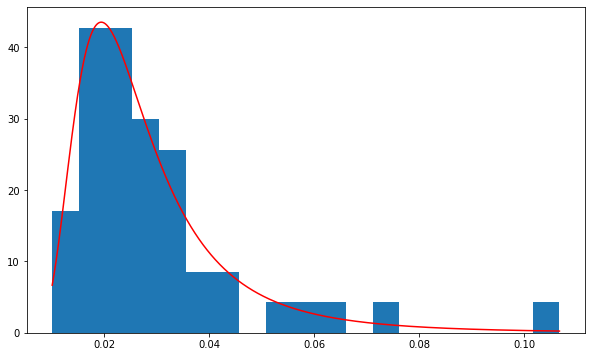

In [27]:
L = []
step = 10
i = step
while i < len(X) + 1:
    L.append(max(X[i-step:i]))
    i += step
print('n =', len(L))

ksi, mu, sigma = sp.genextreme.fit(L)
print('ksi =', ksi)
print('mu =', mu)
print('sigma =', sigma)

plt.figure(figsize=(10, 6))
plt.hist(L, bins=19, density=True)
xs = np.linspace(min(L), max(L), 1000)
plt.plot(xs, sp.genextreme.pdf(xs, ksi, mu, sigma), c='red')
plt.show()

In [16]:
sp.kstest(L, 'genextreme', [ksi, mu, sigma])

KstestResult(statistic=0.12460804613142029, pvalue=0.16808472381958273)

In [31]:
def norm_kde(x, best_fit = None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    x = np.array(sorted(x))
    mi = np.mean(x)
    sigma = np.std(x)
    
    plt.hist(x, bins = 50, density = True, color = 'white', ec = 'black')
    y = sp.norm.pdf(x, mi, sigma) #rozkład normalny
    plt.plot(x, y, color = 'blue', label = 'normal pdf')
    if best_fit == 'logistic':
        y2 = sp.logistic.pdf(x, mi, np.sqrt(3)/np.math.pi*sigma) #rozkład logistyczny
        plt.plot(x, y2, color = 'red', label = 'logistic pdf')
    if best_fit == 'laplace':
        y2 = sp.laplace.pdf(x, mi, 1/np.sqrt(2) * sigma)
        plt.plot(x, y2, color = 'red', label = 'laplace pdf')
    if best_fit == 'GEV':
        y2 = sp.genextreme.pdf(x, ksi, mu, sigma) #rozkład GEV
        plt.plot(x, y2, color = 'red', label = 'GEV pdf')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

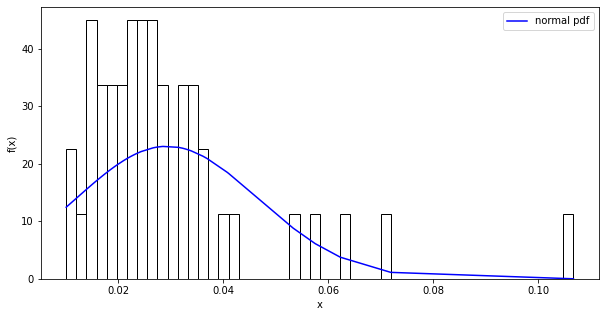

In [32]:
norm_kde(L, 'genextreme')

In [34]:
sp.ttest_ind()

0.888888888888889